Enter secret message: swayam
Enter password: 27012003
Message encoded successfully! Saved as 'encoded_image.png'


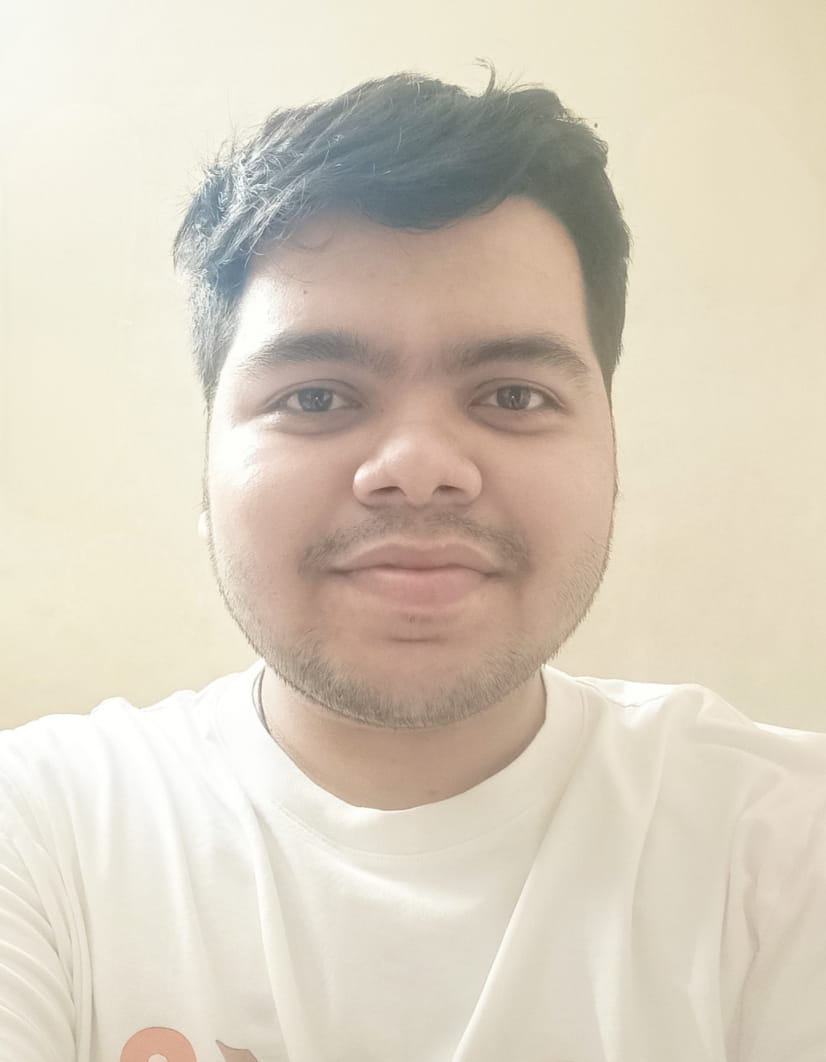

Enter password for decryption: 27012003
Decrypted Message: swayam


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def encode_message(image_path, message, password):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found!")
        return None

    msg = password + ":" + message
    msg += "EOF"

    msg_index = 0
    msg_bin = ''.join(format(ord(char), '08b') for char in msg)

    h, w, _ = img.shape
    total_pixels = h * w * 3

    if len(msg_bin) > total_pixels:
        print("Error: Message too long for the image!")
        return None

    idx = 0
    for i in range(h):
        for j in range(w):
            for k in range(3):
                if idx < len(msg_bin):
                    img[i, j, k] = (img[i, j, k] & ~1) | int(msg_bin[idx])
                    idx += 1
                else:
                    break

    cv2.imwrite("encoded_image.png", img)
    print("Message encoded successfully! Saved as 'encoded_image.png'")
    return img

def decode_message(image_path, password):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found!")
        return None

    msg_bin = ""

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(3):
                msg_bin += str(img[i, j, k] & 1)

    msg_chars = [chr(int(msg_bin[i:i+8], 2)) for i in range(0, len(msg_bin), 8)]
    message = "".join(msg_chars).split("EOF")[0]

    if message.startswith(password + ":"):
        print("Decrypted Message:", message[len(password)+1:])
    else:
        print("Incorrect password! Unable to decrypt.")

image_path = "mypic.jpg"

message = input("Enter secret message: ")
password = input("Enter password: ")
encoded_img = encode_message(image_path, message, password)

if encoded_img is not None:
    cv2_imshow(encoded_img)

password_input = input("Enter password for decryption: ")
decode_message("encoded_image.png", password_input)